# Домашее задание №5

В файле advertising.csv содержаться данные о клиентах интернет-магазина.

Набор данных содержит следующие переменные:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


Задача - создать модель, которая будет предсказывать, нажмет ли интернет-пользователь на рекламу, на основе характеристик этого пользователя.

Задания:

    •	Сформулируйте гипотезы исследования.
    •	Постройте модель бинарной логистической регрессии. Зависимая переменная - 'Clicked on Ad'. В качестве предикторов выберите не менее 3 метрических переменных и не менее 2 категориальных переменных.
    •	Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели. Оцените статическую значимость и предсказательную силу модели.
    •	Оцените значимость регрессионных коэффициентов. Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной.
    •	Проведите диагностику модели (проверьте остатки на нормальность, оцените мультиколлинартность).
    •	Осуществите кросс-валидацию и опишите ее результаты.
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv', index_col=0)
df.head(25)

,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,,,,,,,,,
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 68.95 to 45.01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Area Income           1000 non-null   float64
 2   Daily Internet Usage  1000 non-null   float64
 3   Ad Topic Line         1000 non-null   object 
 4   City                  1000 non-null   object 
 5   Male                  1000 non-null   int64  
 6   Country               1000 non-null   object 
 7   Timestamp             1000 non-null   object 
 8   Clicked on Ad         1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 78.1+ KB


In [4]:
# Названия переменных, сгруппированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['Age' 'Male' 'Clicked on Ad']

Type: float64
['Area Income' 'Daily Internet Usage']

Type: object
['Ad Topic Line' 'City' 'Country' 'Timestamp']



In [5]:
# Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

# ура, нет пропусков!

,Процент пропущенных значений


## Гипотезы исследования
H0: Некоторые метрики влияют на вероятность клика по рекламе

H1: или не влияют

<font color='red'> гипотезы формулируются отдельно для каждого предиктора следующим образом: Н_0 предиктор не влияет на таргет, Н_1 - влияет на тергет</font>

## Выбор переменных
`Ad Topic Line`, `City`, `Country`и `Timestamp` не хочется выбирать, так как данные сильно различаются и не получится выявить взаимосвязи. Выберем `Age` (метрическая), `Male` (категориальная), `Area Income` (метрическая) и `Daily Internet Usage` (метрическая)

- в чате писали, что не обязательно выбирать >= 2 категориальных

Категориальная переменная Male принимает 2 значения типа Int (0 или 1), поэтому dummy-переменные создавать не нужно

### Зависимая переменная

In [6]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

### Предварительный анализ взаимосвязей между зависимой переменной и предикторами

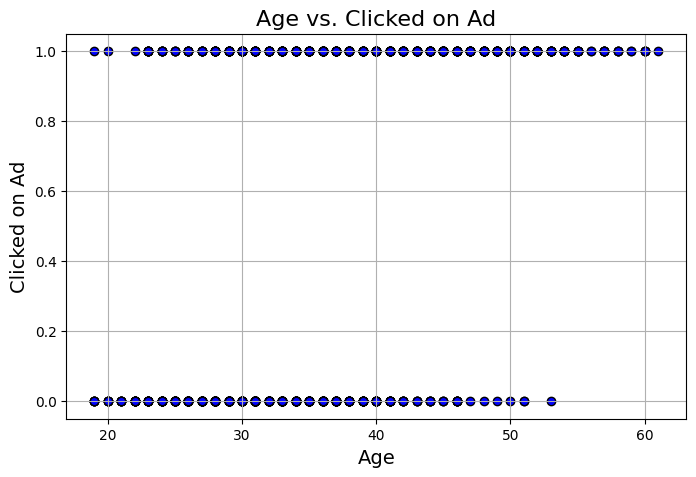

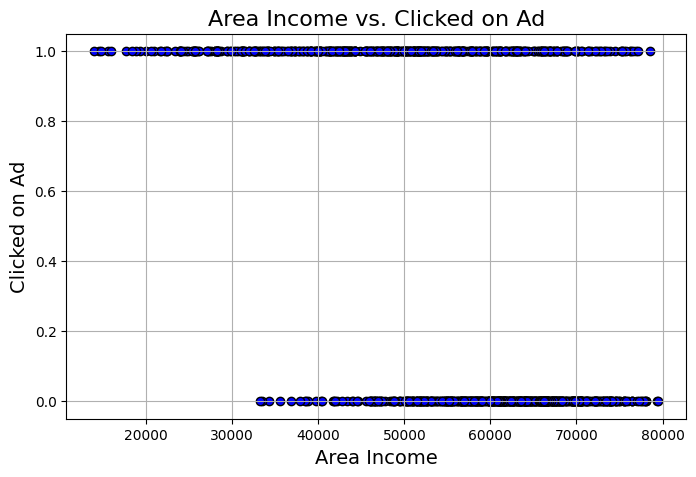

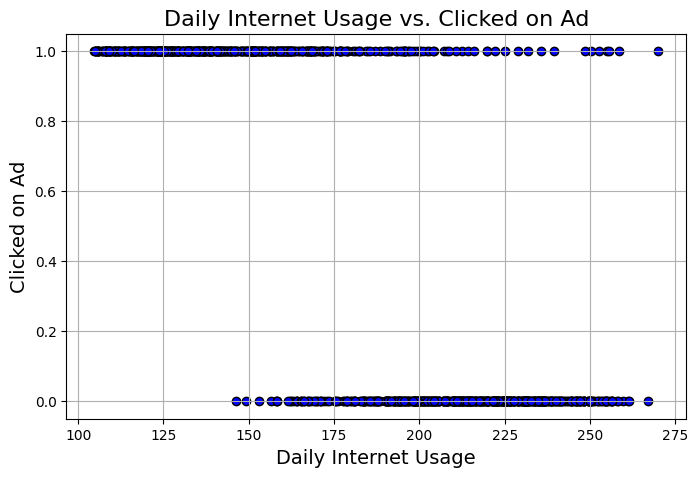

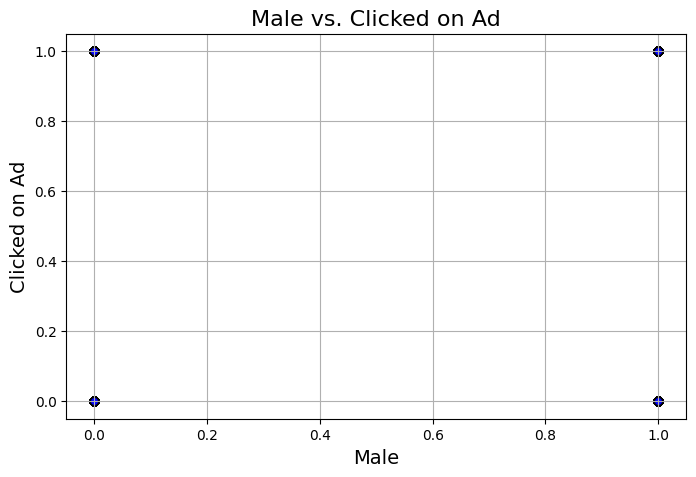

In [7]:
for c in df.columns[:]:
    if c == 'Age' or c == 'Male' or c=='Area Income' or c=='Daily Internet Usage':
        plt.figure(figsize=(8,5))
        plt.title('{} vs. Clicked on Ad'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df['Clicked on Ad'], color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('Clicked on Ad', fontsize=14)
        plt.show()

<font color='red'>не проверила корреляции с таргетом и между предикторами </font>

## Строим модель

In [8]:
x_mult = df[['Age', 'Male', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']
x_mult_constant = sm.add_constant(x_mult)

In [9]:
model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.195477
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.7180
Time:                        13:48:21   Log-Likelihood:                -195.48
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.652e-214
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2809      1.270     10.455      0.000      10.791      15.771

## 3) Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели. Оцените статическую значимость и предсказательную силу модели. И 4) пункт

### Комментарии к выводу модели
- Current function value: 0.195477. Значение функции логарифмической правдоподобности (log-likelihood) в финальной итерации. Маленькое => модель хорошо объясняет данные.
- Pseudo R-squared: 0.7180. Значение 0.7180 указывает на хорошую объяснительную способность модели.
- Log-Likelihood и LL-Null
    - Log-Likelihood: -195.48. Значение логарифма правдоподобия текущей модели.
    - LL-Null: -693.15. Значение логарифма правдоподобия модели без предикторов (только константа). Разница между ними показывает, насколько улучшилась модель.
- LLR p-value: 3.652e-214. p-значение теста отношения правдоподобий, показывающее, что модель с предикторами значительно лучше, чем модель без них.

-----
Интерпретация предикторов
--
- Age (0.1416, p < 0.0001). Увеличение возраста связано с увеличением вероятности клика (положительный коэффициент, значимая связь). Коэффициент 0.1416 означает, что с увеличением возраста на 1 год логарифм отношения шансов возрастает на 0.1416, что соответствует увеличению шансов клика примерно на 15.2%
- Male (-0.3056, p = 0.254). Пол не оказывает статистически значимого влияния на вероятность клика (p > 0.05). То есть различия между мужчинами и женщинами в контексте кликов на рекламу отсутствуют (или не подтверждаются данными).
- Area Income (-0.0001, p < 0.0001). Увеличение дохода связано с уменьшением вероятности клика (значимая отрицательная связь). С увеличением дохода в районе на единицу (например, на 1 доллар) логит вероятности клика уменьшается на 0.0001. Это незначительное влияние на уровне единичных изменений, но в масштабах больших доходов (например, 10_000) шансы клика снижаются существенно
 $e^{−0.0001⋅10000} ≈ 0.367,$ то есть снижение на 63.3%
- Daily Internet Usage (-0.0672, p < 0.0001). Чем больше времени пользователь проводит в интернете, тем ниже вероятность клика (значимая отрицательная связь). Увеличение времени использования интернета на 1 час снижает логит вероятности клика на 0.0672, что соответствует уменьшению шансов клика примерно на 6.5%
($e^{−0.0672} - 1 ≈ −0.065$)
- Const. Константа показывает базовый уровень логита вероятности, когда все предикторы равны 0. Это скорее технический параметр и не интерпретируется в смысле взаимосвязи.


In [10]:
print('Model significance = {:f}'.format(model1.llr_pvalue))

Model significance = 0.000000


In [11]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 13.280906 + 0.14*Age + -0.31*Male + -0.00*Area Income + -0.07*Daily Internet Usage


Модель статистически значима, уравнение регрессии выше

### Матрица ошибок

In [12]:
cm = model1.pred_table()
cm

array([[476.,  24.],
       [ 41., 459.]])

In [13]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Точность (процент верно предсказанных событий): = {}'.format(accuracy))

Точность (процент верно предсказанных событий): = 0.935


### ROC-curve

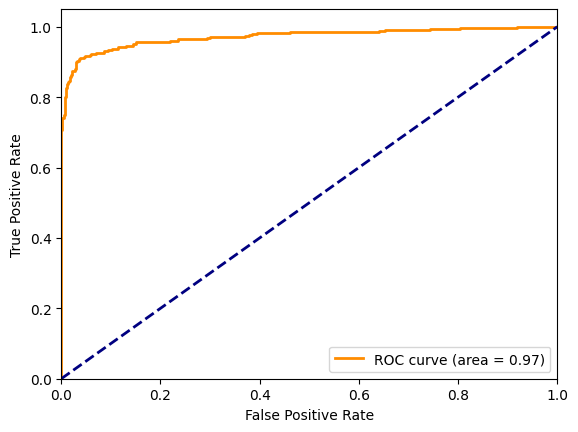

In [14]:
fpr, tpr, _ = roc_curve(df['Clicked on Ad'], model1.predict())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

отличный результат

## 5) Диагностика модели

### Остатки

In [15]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


<Axes: ylabel='Density'>

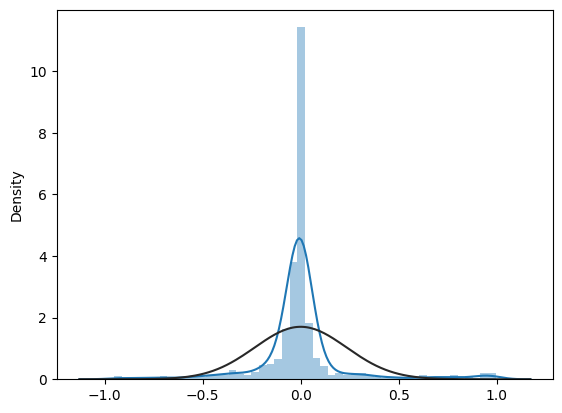

In [16]:
sns.distplot(model1.resid_generalized, fit=stats.norm)
# Распределение остатков отличается от нормального распределения.

### Мультиколлинеарность

In [17]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

# Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

,VIF,Features
1,1.001008,Male
2,1.133737,Area Income
0,1.161245,Age
3,1.267338,Daily Internet Usage


## 6)  Осуществите кросс-валидацию и опишите ее результаты.
Разделим данные на обучающую и тестовую выборки в пропорции 80% и 20% соответственно.

In [18]:
# Сохранение предсказанной вероятности наступления события для каждого наблюдения
df['probability'] = model1.predict()
df

,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,probability
Daily Time Spent on Site,,,,,,,,,,
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.005576
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.073688
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.007133
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0.007050
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.012815
...,...,...,...,...,...,...,...,...,...,...
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0.018637
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0.970850
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0.999609


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_mult, y, test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

# выходные данные после обучения модели на обучающей выборке

Train Result:
Accuracy Score: 91.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.890777    0.935567    0.9125    0.913172      0.913620
recall       0.936224    0.889706    0.9125    0.912965      0.912500
f1-score     0.912935    0.912060    0.9125    0.912498      0.912489
support    392.000000  408.000000    0.9125  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[367  25]
 [ 45 363]]



In [20]:
pred = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# результаты модели на тестовой выборке

Test Result:
Accuracy Score: 92.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.918182   0.922222      0.92    0.920202      0.920040
recall       0.935185   0.902174      0.92    0.918680      0.920000
f1-score     0.926606   0.912088      0.92    0.919347      0.919927
support    108.000000  92.000000      0.92  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[101   7]
 [  9  83]]



- Accuracy Score: 92.00% => модель правильно предсказала класс в 92% случаев.
- precision показывает точность предсказаний для каждого класса
- Recall (полнота). Это доля правильно предсказанных положительных примеров из всех реальных положительных примеров. В среднем по всем классам: 91.87%. Модель хорошо находит как отрицательные, так и положительные примеры, но немного хуже распознает класс 1 (положительный).
- F1-Score. Это среднее гармоническое точности и полноты, дающее более сбалансированное представление о модели. В среднем по всем классам: 91.93%. F1-Score показывает хорошее сочетание точности и полноты, с небольшим преимуществом у класса 0.

## 7) Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Выводы
--
- Регрессионный анализ показал, что некоторые предикторы оказывают значительное влияние на вероятность клика по рекламе, в то время как другие — менее значимы. Так, пол человека оказался не важен, а вот возраст, ежедневное использование интернета и доход в районе влияют на клик по рекламе
- Модель получилась хорошая, объясняет большой процент данных


Неожиданные результаты:
--
- Пол как предиктор оказался незначимым. Я думала, что мужчины и женщины могут иметь разные паттерны поведения в отношении онлайн-рекламы, но регрессионный анализ показал, что пол не влияет на вероятность кликов.
- Результаты для дохода в районе (Area Income) также несколько неожиданны, так как предполагалось, что люди с высоким доходом скорее будут интересоваться онлайн-рекламой, однако анализ показал слабую отрицательную связь.

Ожидаемые результаты:
--
- Чем больше человек пользуется интернетом, тем меньше он кликает на рекламу. Так как люди, которые проводят больше времени в интернете, как правило, имеют обладают развитыми навыками фильтрации контента и могут лучше распознавать рекламу. Они могут быть более осведомлены о маркетинговых тактиках и стремиться избегать нежелательных рекламных материалов.Так же они они могут использовать расширения браузера для блокировки рекламы или предпочитать подписки на платные сервисы, которые предоставляют контент без рекламы.
- Возраст. Молодые пользователи обычно более восприимчивы к интернет-рекламе. Молодежь активно использует интернет и социальные сети, часто взаимодействует с рекламой, особенно если она соответствует их интересам. Более зрелые пользователи, как правило, не так активно используют интернет для покупок или развлечений, что может привести к меньшей склонности кликать на рекламу.

Гипотеза H0 подтвердилась - некоторые метрики влияют на вероятность клика по рекламе, а некоторые не влияют

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 27 ноября.